In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('main.csv')

In [4]:
df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am currently employed at least part-time', 'I am legally disabled',
       'I have my regular access to the internet', 'I live with my parents',
       'I have a gap in my resume', 'Total length',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed

# датасет был создан на основе опросника между 334 людьми с целью выявить, какие факторы больше всего влияют на ментальное здоровье, каждый атрибут в целом понятно подписан, по своему назначению

In [6]:
df.isnull().sum()

Respondent ID                                                     1
Collector ID                                                      1
Start Date                                                        1
End Date                                                          1
IP Address                                                      335
Email Address                                                   335
First Name                                                      335
Last Name                                                       335
Custom Data 1                                                     1
I identify as having a mental illness                             0
Education                                                         0
I have my own computer separate from a smart phone                0
I have been hospitalized before for my mental illness             0
How many days were you hospitalized for your mental illness      37
I am currently employed at least part-time      

In [7]:
df = df.drop(columns=['Collector ID', 'IP Address', 'Email Address', 'Custom Data 1','Respondent ID','Start Date','End Date','First Name','Last Name'])

# удалила столбцы, где вообще не было данных

In [8]:
df.columns

Index(['I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am currently employed at least part-time', 'I am legally disabled',
       'I have my regular access to the internet', 'I live with my parents',
       'I have a gap in my resume', 'Total length',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Age',
       'Gender', 'Household Income', 'Region', 'Device Type'],
    

In [9]:
df.shape

(335, 31)

In [10]:
df.rename(columns={'Unnamed: 28': 'Anxiety'}, inplace=True)
df.rename(columns={'Unnamed: 29': 'Depression'}, inplace=True)
df.rename(columns={'Unnamed: 31': 'Mood Swings'}, inplace=True)
df.rename(columns={'Unnamed: 32': 'Panic attacks'}, inplace=True)
df.rename(columns={'Unnamed: 33': 'Compulsive behavior'}, inplace=True)
df.rename(columns={'Unnamed: 30': 'Obsessive thinking'}, inplace=True)
df.rename(columns={'Unnamed: 34': 'Tiredness'}, inplace=True)
df.rename(columns={'Total length': 'Total length of any gaps in my resume in months'}, inplace=True)

# забила пропуск ,а наличие текста 1. 1 присутствует один из симптомов, 0 отсутствует

In [11]:
df['Anxiety'].fillna(0, inplace=True)
df['Anxiety'] = df['Anxiety'].apply(lambda x: 1 if x != 0 else 0)
df['Depression'].fillna(0, inplace=True)
df['Depression'] = df['Depression'].apply(lambda x: 1 if x != 0 else 0)
df['Mood Swings'].fillna(0, inplace=True)
df['Mood Swings'] = df['Mood Swings'].apply(lambda x: 1 if x != 0 else 0)
df['Panic attacks'].fillna(0, inplace=True)
df['Panic attacks'] = df['Panic attacks'].apply(lambda x: 1 if x != 0 else 0)
df['Compulsive behavior'].fillna(0, inplace=True)
df['Compulsive behavior'] = df['Compulsive behavior'].apply(lambda x: 1 if x != 0 else 0)
df['Obsessive thinking'].fillna(0, inplace=True)
df['Obsessive thinking'] = df['Obsessive thinking'].apply(lambda x: 1 if x != 0 else 0)
df['Tiredness'].fillna(0, inplace=True)
df['Tiredness'] = df['Tiredness'].apply(lambda x: 1 if x != 0 else 0)
df['Lack of concentration'].fillna(0, inplace=True)
df['Lack of concentration'] = df['Lack of concentration'].apply(lambda x: 1 if x != 0 else 0)

# а это хи квадрат тест

In [12]:
from scipy.stats import chi2_contingency

contingency_tables = {}
for column in df.columns:
    if column != '':
        contingency_table = pd.crosstab(df['I identify as having a mental illness'], df[column])
        contingency_tables[column] = contingency_table

results = {}
for column, contingency_table in contingency_tables.items():
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results[column] = {'Chi-square': chi2, 'P-value': p_value}

for column, result in results.items():
    print(f"Атрибут: {column}")
    print(f"Статистика Хи-квадрат: {result['Chi-square']}")
    print(f"P-значение: {result['P-value']}")
    print()


Атрибут: I identify as having a mental illness
Статистика Хи-квадрат: 670.0
P-значение: 1.0906561178326055e-143

Атрибут: Education
Статистика Хи-квадрат: 340.6434102933071
P-значение: 9.221388219580454e-63

Атрибут: I have my own computer separate from a smart phone
Статистика Хи-квадрат: 340.2914207641853
P-значение: 2.1878768848825664e-72

Атрибут: I have been hospitalized before for my mental illness
Статистика Хи-квадрат: 399.6075463660355
P-значение: 3.3813934906372123e-85

Атрибут: How many days were you hospitalized for your mental illness
Статистика Хи-квадрат: 367.3185099669805
P-значение: 6.947311184724232e-50

Атрибут: I am currently employed at least part-time
Статистика Хи-квадрат: 336.44682891675467
P-значение: 1.478971575953434e-71

Атрибут: I am legally disabled
Статистика Хи-квадрат: 353.87190752847215
P-значение: 2.5583227949244116e-75

Атрибут: I have my regular access to the internet
Статистика Хи-квадрат: 337.15080324538235
P-значение: 1.0423081772504843e-71

Атри

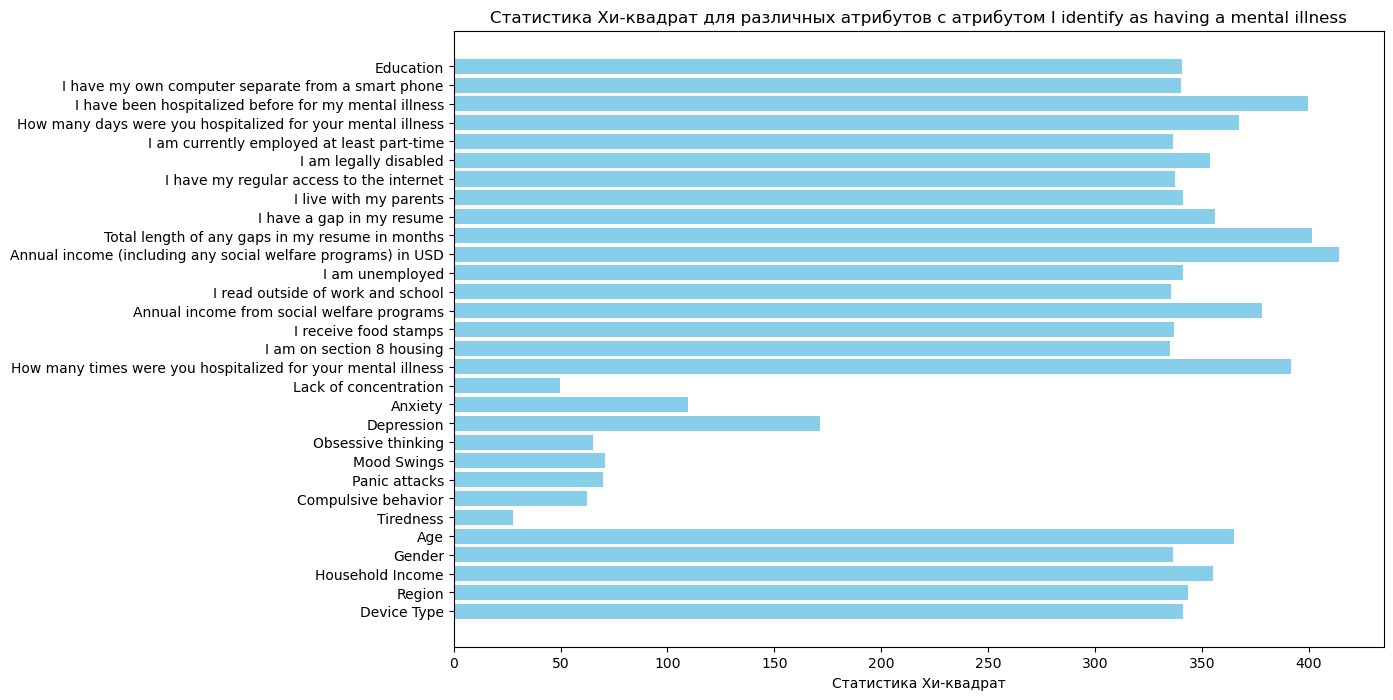

In [13]:

atr = ["Education", "I have my own computer separate from a smart phone", "I have been hospitalized before for my mental illness", "How many days were you hospitalized for your mental illness", "I am currently employed at least part-time", "I am legally disabled", "I have my regular access to the internet", "I live with my parents", "I have a gap in my resume", "Total length of any gaps in my resume in months", "Annual income (including any social welfare programs) in USD", "I am unemployed", "I read outside of work and school", "Annual income from social welfare programs", "I receive food stamps", "I am on section 8 housing", "How many times were you hospitalized for your mental illness", "Lack of concentration", "Anxiety", "Depression", "Obsessive thinking", "Mood Swings", "Panic attacks", "Compulsive behavior", "Tiredness", "Age", "Gender", "Household Income", "Region", "Device Type"]
stats = [340.6434102933071, 340.2914207641853, 399.6075463660355, 367.3185099669805, 336.44682891675467, 353.87190752847215, 337.15080324538235, 341.3047903845148, 355.9962357506378, 401.43946778370025, 414.16956807228365, 341.0862011916611, 335.5804217782564, 378.1041131577303, 336.99771488354156, 335.08400842096574, 391.4522156551503, 49.688780644507126, 109.45162987111854, 171.4099070735857, 65.22498184511343, 70.88042272189664, 69.8798708385136, 62.1550511488318, 27.74687966222425, 364.9165878309972, 336.5520595599861, 355.0892746268085, 343.2571635817825, 341.09344425382835]
plt.figure(figsize=(12, 8))
plt.barh(atr, stats, color='skyblue')
plt.xlabel('Статистика Хи-квадрат')
plt.title('Статистика Хи-квадрат для различных атрибутов с атрибутом I identify as having a mental illness')
plt.gca().invert_yaxis()  # инвертируем ось y, чтобы легенды шли сверху вниз
plt.show()


# получается на ментальное здоровье влияет почти всё

In [15]:
df=df.iloc[1:]

# удалила 1 строку где было написано Response

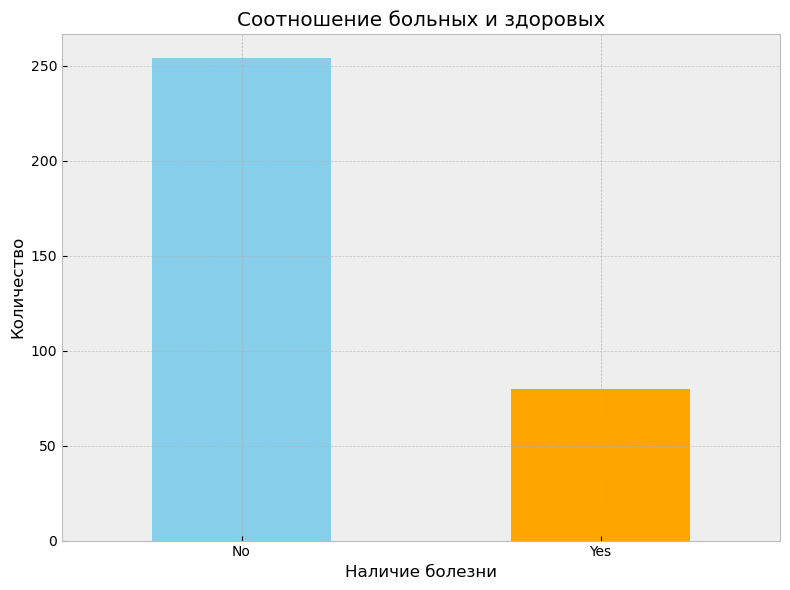

In [18]:
counts = df['I identify as having a mental illness'].value_counts()
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Соотношение больных и здоровых')
plt.xlabel('Наличие болезни')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

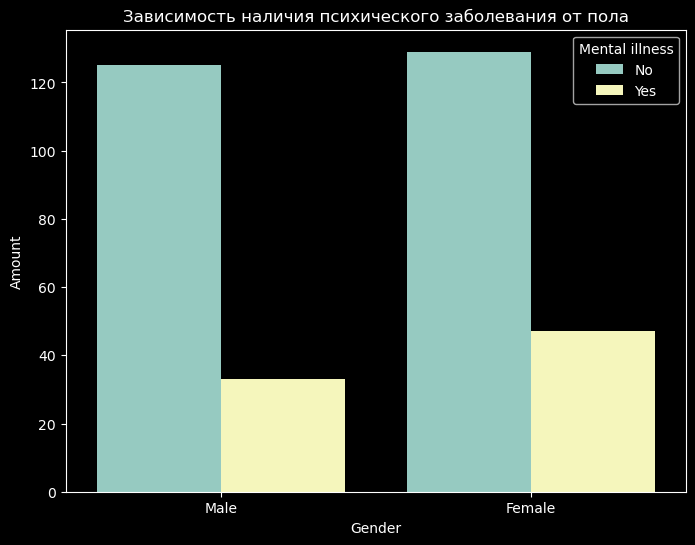

In [54]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='I identify as having a mental illness', data=df)
plt.title('Зависимость наличия психического заболевания от пола')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.legend(title='Mental illness', loc='upper right')
plt.show()

# Как мы видим пол не влияет на ментальное здоровье

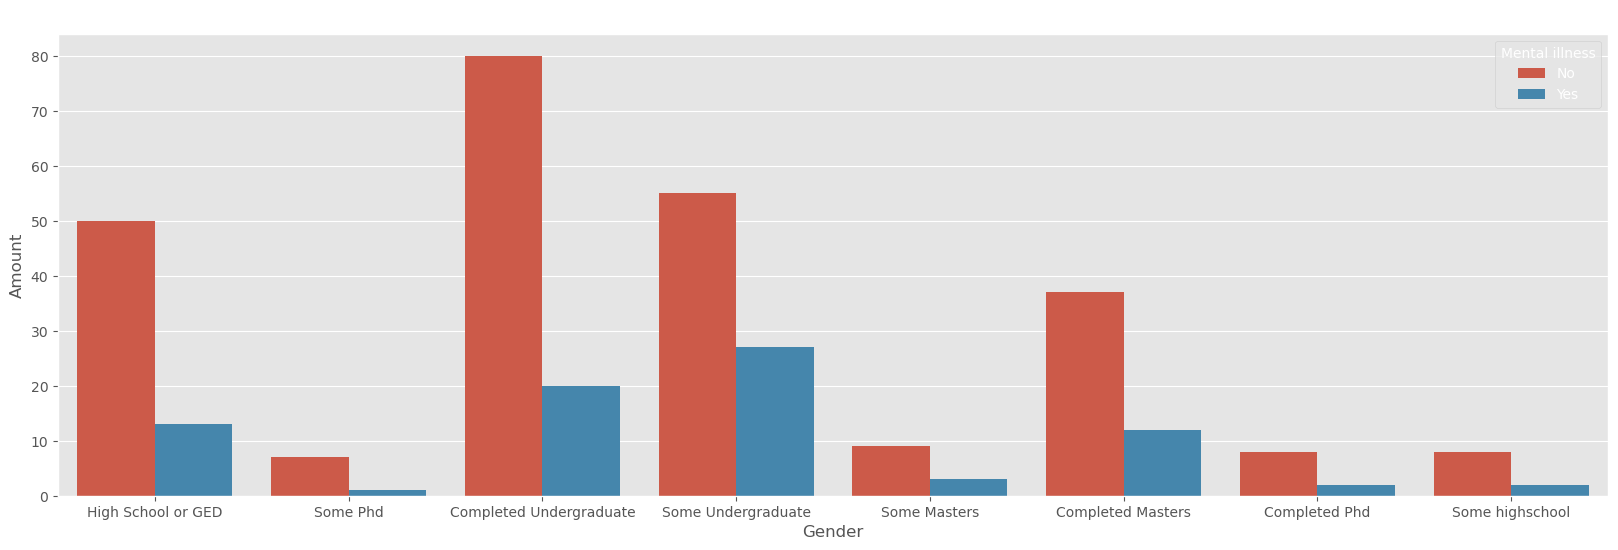

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 6))
sns.countplot(x='Education', hue='I identify as having a mental illness', data=df)
plt.title('Зависимость наличия психического заболевания от уровня образования')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.legend(title='Mental illness', loc='upper right')
plt.show()

# больше всего нездоровых среди категории some undergraduate

Text(0.5, 1.0, 'Зависимость наличия психического заболевания от возраста')

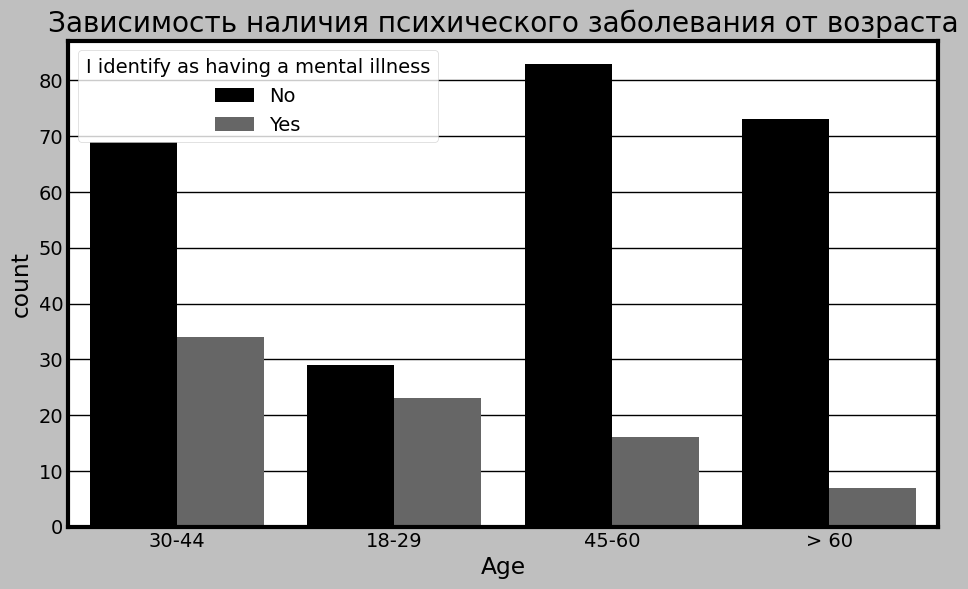

In [57]:
plt.style.use('grayscale')
plt.figure(figsize=(10,6))
sns.countplot(x="Age",hue="I identify as having a mental illness",data=df)
plt.title('Зависимость наличия психического заболевания от возраста')

# чаще всего психическое заболевание наблюдается у группы 18-29 лет. это ожидаемо

Text(0.5, 1.0, 'Зависимость наличия психического заболевания от того живет ли респондент с родителями')

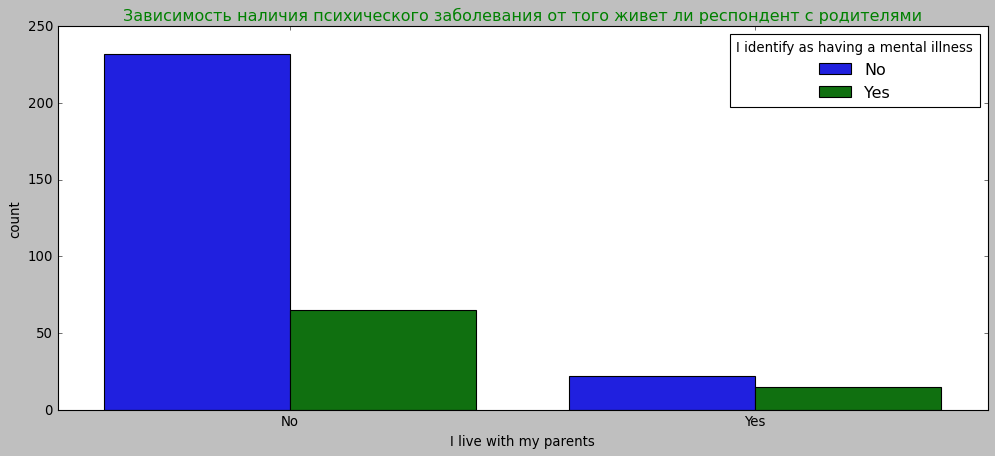

In [62]:
plt.style.use('classic')
plt.figure(figsize=(15,6))
sns.countplot(x="I live with my parents",hue="I identify as having a mental illness",data=df)
plt.title('Зависимость наличия психического заболевания от того живет ли респондент с родителями',color="green")

# интересно, что те кто живут с родителями в 50% случаях являются ментально нездоровыми

Text(0.5, 1.0, 'Зависимость наличия психического заболевания от региона')

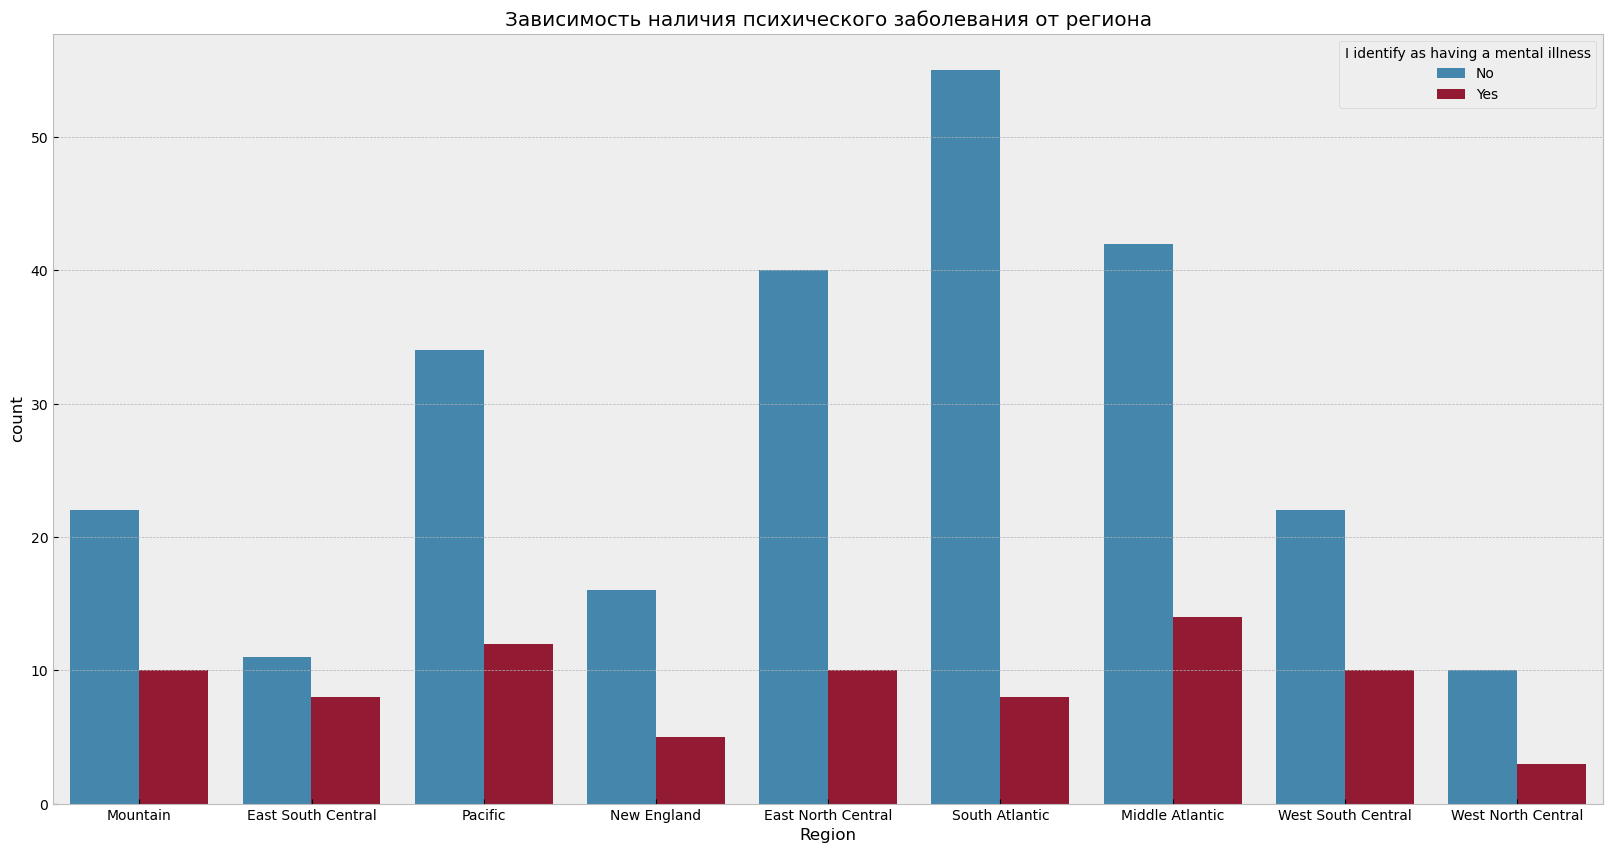

In [16]:
plt.style.use('bmh')
plt.figure(figsize=(20,10))
sns.countplot(x="Region",hue="I identify as having a mental illness",data=df)
plt.title('Зависимость наличия психического заболевания от региона')

# в районе east south central статистика больных почти 50 на 50

Text(0.5, 1.0, 'Зависимость наличия психического заболевания от наличия работы')

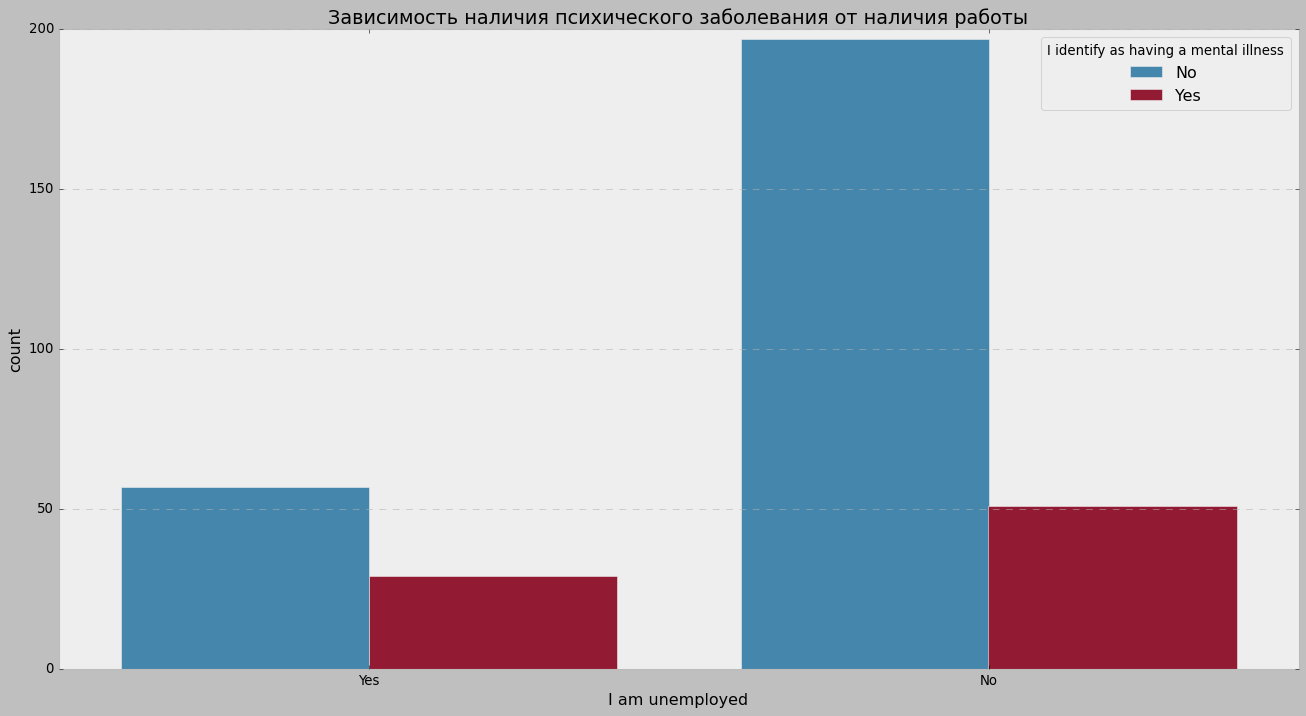

In [64]:
plt.style.use('bmh')
plt.figure(figsize=(20,10))
sns.countplot(x="I am unemployed",hue="I identify as having a mental illness",data=df)
plt.title('Зависимость наличия психического заболевания от наличия работы')

# у больных процент безработных значительно выше